In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('synthetic_health_lifestyle_dataset.csv')

In [3]:
df.set_index('ID' , inplace = True)

In [4]:
df

,Age,Gender,Height_cm,Weight_kg,BMI,Smoker,Exercise_Freq,Diet_Quality,Alcohol_Consumption,Chronic_Disease,Stress_Level,Sleep_Hours
ID,,,,,,,,,,,,
1,56,Other,177.6,37.3,11.8,Yes,NaN,Poor,NaN,No,9,8.5
2,69,Other,169.3,70.7,24.7,No,1-2 times/week,Good,High,No,2,5.9
3,46,Female,159.1,69.0,27.3,No,Daily,Excellent,Moderate,No,3,4.8
4,32,Male,170.6,76.4,26.3,No,3-5 times/week,Excellent,Moderate,No,9,6.6
5,60,Male,158.4,60.4,24.1,No,3-5 times/week,Excellent,Low,Yes,6,6.1
...,...,...,...,...,...,...,...,...,...,...,...,...
7496,55,Other,168.3,52.4,18.5,Yes,1-2 times/week,Average,Moderate,Yes,4,5.5
7497,24,Male,179.1,58.8,18.3,No,3-5 times/week,Excellent,Moderate,No,5,7.6
7498,61,Other,160.2,80.0,31.2,No,3-5 times/week,Poor,Moderate,No,5,6.2


In [5]:
df.describe()

,Age,Height_cm,Weight_kg,BMI,Stress_Level,Sleep_Hours
count,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,43.653333,164.949467,70.036040,26.032493,5.591867,7.002933
std,14.911816,9.960921,14.741595,6.432411,2.865983,1.514014
min,18.000000,124.500000,17.700000,6.500000,1.000000,1.900000
25%,31.000000,158.100000,59.900000,21.600000,3.000000,6.000000
50%,43.000000,164.900000,70.100000,25.600000,6.000000,7.000000
75%,57.000000,171.600000,80.100000,30.100000,8.000000,8.000000
max,69.000000,197.000000,128.500000,56.800000,10.000000,12.600000


In [12]:
# plt.style.available   
plt.style.use('seaborn-v0_8-notebook')

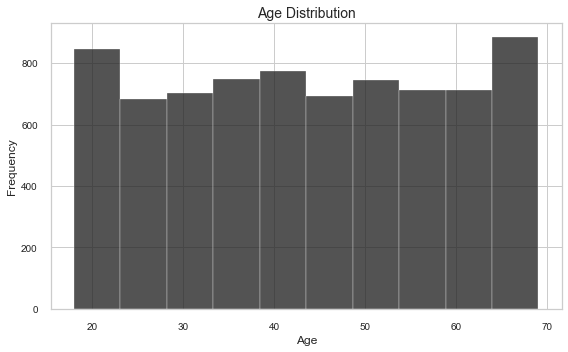

In [13]:
#Plotting the distribution of Age using a histogram

plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Age', bins=10, color='k')
plt.title('Age Distribution', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()



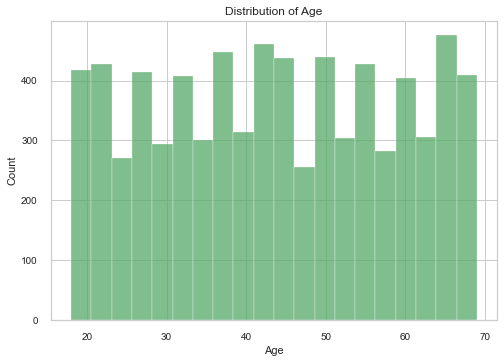

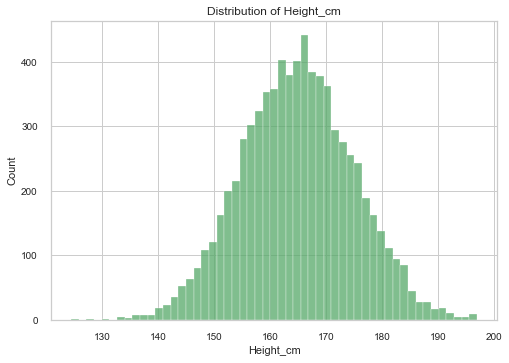

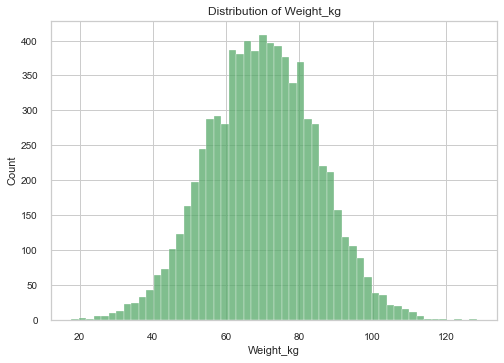

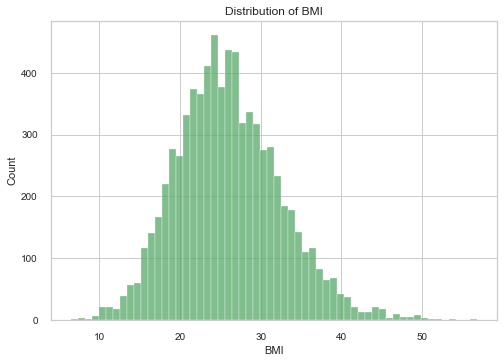

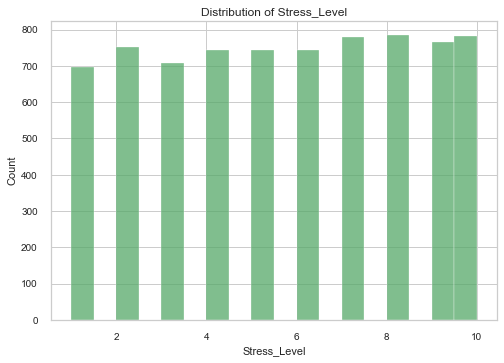

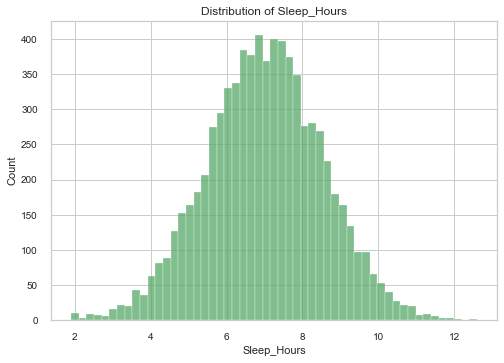

In [14]:
## Looking at the distribution of all the numerical cols
numeric_cols = df.select_dtypes(include = 'number')

for i in numeric_cols:
    sns.histplot(x = i, data = df, color = 'g')
    plt.title(f'Distribution of {i}')
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.show()


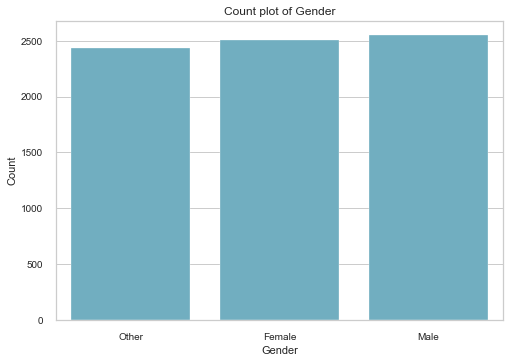

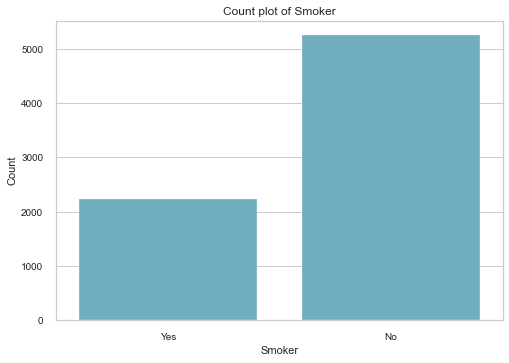

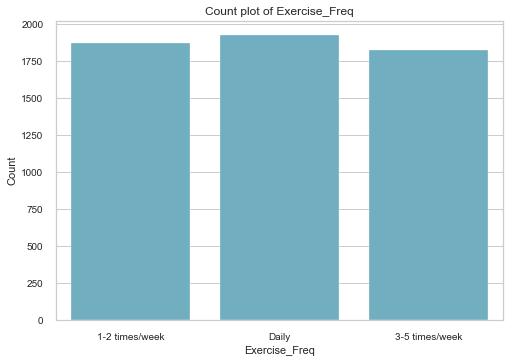

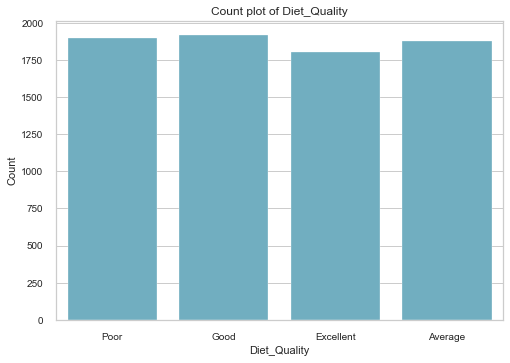

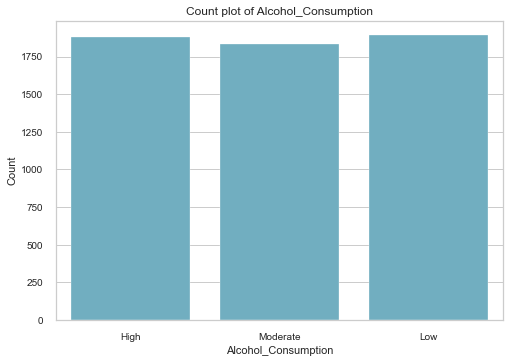

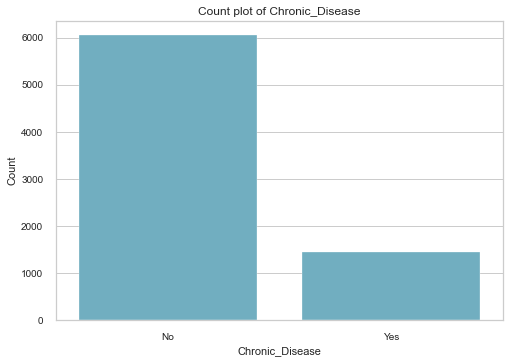

In [15]:
## Distribution of the cat_cols 

cat_cols = df.select_dtypes(include = 'object')
for i in cat_cols:
    sns.countplot(x = i, data = df, color = 'c')
    plt.title(f'Count plot of {i}')
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.show()

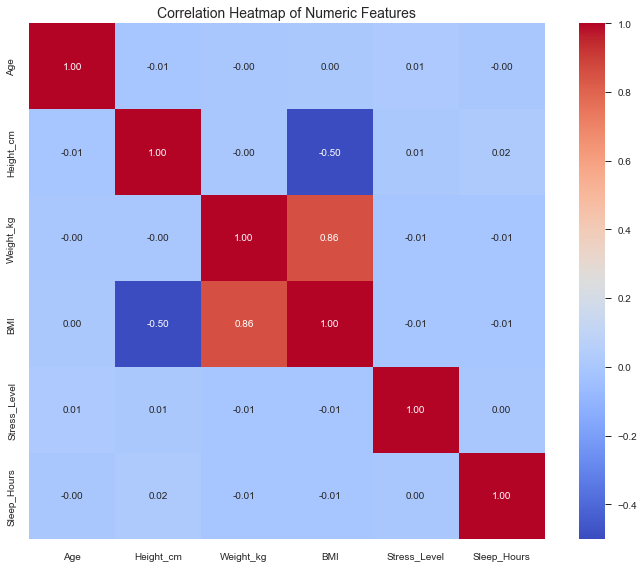

In [27]:
## Generating a heatmap to visualize pairwise correlations among numeric features

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_cols.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Numeric Features', fontsize=14)
plt.tight_layout()
plt.show()



Based on the plot there is a high positive correlation between BMI and Weight_kg

In [28]:
## null check 

df.isnull().sum()

Age                       0
Gender                    0
Height_cm                 0
Weight_kg                 0
BMI                       0
Smoker                    0
Exercise_Freq          1879
Diet_Quality              0
Alcohol_Consumption    1892
Chronic_Disease           0
Stress_Level              0
Sleep_Hours               0
dtype: int64

In [29]:
df['Alcohol_Consumption'].value_counts()

Alcohol_Consumption
Low         1893
High        1882
Moderate    1833
Name: count, dtype: int64

## Handling Null Values in Alcohol Consumption Data

In [45]:
# Known values (for training)
df_known = df[df['Alcohol_Consumption'].notna()]
df_unknown = df[df['Alcohol_Consumption'].isna()]


In [47]:
features = [i for i in df.columns if i not in ['Weight_kg','Alcohol_Consumption']]
cat_cols = [i for i in df.select_dtypes(include = 'object').columns if i != 'Alcohol_Consumption']
num_cols = [i for i in df.select_dtypes(include = 'number').columns if i != 'Weight_kg']


In [48]:
X_train = df_known[features]
X_test = df_unknown[features]
y_train = df_known['Alcohol_Consumption']


In [49]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
        ('num', 'passthrough', num_cols)
    ]
)


In [50]:
pipe = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

In [51]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)


In [52]:
pipe.fit(X_train, y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'Smoker',
                                                   'Exercise_Freq',
                                                   'Diet_Quality',
                                                   'Chronic_Disease']),
                                                 ('num', 'passthrough',
                                                  ['Age', 'Height_cm', 'BMI',
                                                   'Stress_Level',
                                                   'Sleep_Hours'])])),
                ('classifier', RandomForestClassifier())])

In [53]:
y_pred_encoded = pipe.predict(X_test)
y_pred = le.inverse_transform(y_pred_encoded)

In [55]:
df.loc[df['Alcohol_Consumption'].isna(), 'Alcohol_Consumption'] = y_pred


In [56]:
df['Alcohol_Consumption'].isna().sum()

0

## Filling Missing Entries in Exercise_Freq Column

In [57]:
## we want to create two dataframe one with the null and the one without the null 
data_without_null = df[df['Exercise_Freq'].notna()]
data_with_null = df[df['Exercise_Freq'].isna()]

In [58]:
features = [i for i in df.columns if i not in ['Weight_kg','Exercise_Freq']]
cat_cols = [i for i in df.select_dtypes(include = 'object').columns if i != 'Exercise_Freq']
num_cols = [i for i in df.select_dtypes(include = 'number').columns if i != 'Weight_kg']


In [59]:
X_train = data_without_null[features]
X_test = data_with_null[features]
y_train = data_without_null['Exercise_Freq']


In [60]:
# OneHotEncoder with handling unknown categories
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
        ('num', 'passthrough', num_cols)
    ]
)
    

In [61]:
pipe = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

In [62]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

In [63]:
pipe.fit(X_train, y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'Smoker',
                                                   'Diet_Quality',
                                                   'Alcohol_Consumption',
                                                   'Chronic_Disease']),
                                                 ('num', 'passthrough',
                                                  ['Age', 'Height_cm', 'BMI',
                                                   'Stress_Level',
                                                   'Sleep_Hours'])])),
                ('classifier', RandomForestClassifier())])

In [64]:
y_pred_encoded = pipe.predict(X_test)
y_pred = le.inverse_transform(y_pred_encoded)

In [65]:
y_pred

array(['1-2 times/week', '1-2 times/week', 'Daily', ..., 'Daily',
       '3-5 times/week', '3-5 times/week'], dtype=object)

In [66]:
df.loc[df['Exercise_Freq'].isna(), 'Exercise_Freq'] = y_pred

In [107]:
df.isna().sum()

Age                    0
Gender                 0
Height_cm              0
Weight_kg              0
BMI                    0
Smoker                 0
Exercise_Freq          0
Diet_Quality           0
Alcohol_Consumption    0
Chronic_Disease        0
Stress_Level           0
Sleep_Hours            0
dtype: int64

All missing values were appropriately handled using suitable imputation 

## Chronic Illness Classification

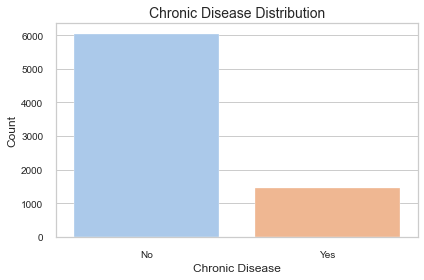

In [74]:
# Visualizing the distribution of chronic disease cases using a count plot

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Chronic_Disease', palette='pastel')
plt.title('Chronic Disease Distribution', fontsize=14)
plt.xlabel('Chronic Disease', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

Case of imbalanced data

In [79]:
features = [i for i in df.columns if i not in ['Weight_kg', 'Chronic_Disease']]
cat_cols = [i for i in df.select_dtypes(include = 'object').columns if i != 'Chronic_Disease' ]
num_cols = [i for i in df.select_dtypes(include = 'number').columns if i != 'Weight_kg']


In [85]:
X= df[features] 
y= df['Chronic_Disease']

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state = 2)

### Random Forest

#### Without class weight balance 

In [ ]:
# OneHotEncoder with handling unknown categories
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
        ('num', 'passthrough', num_cols)
    ]
)
    

In [120]:
pipe_rf_nb = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [121]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

In [122]:
pipe_rf_nb.fit(X_train, y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'Smoker',
                                                   'Exercise_Freq',
                                                   'Diet_Quality',
                                                   'Alcohol_Consumption']),
                                                 ('num', 'passthrough',
                                                  ['Age', 'Height_cm', 'BMI',
                                                   'Stress_Level',
                                                   'Sleep_Hours'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [123]:
y_pred_encoded = pipe_rf_nb.predict(X_test)
y_pred_rf_nb = le.inverse_transform(y_pred_encoded)

In [124]:
print(classification_report(y_test, y_pred_rf_nb))

              precision    recall  f1-score   support

          No       0.81      0.99      0.89      1217
         Yes       0.12      0.00      0.01       283

    accuracy                           0.81      1500
   macro avg       0.47      0.50      0.45      1500
weighted avg       0.68      0.81      0.73      1500



Accuracy (81%) is misleading due to class imbalance.

#### using class_weight = 'balanced'

In [125]:
pipe_rf_b = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(class_weight='balanced', random_state=42))
])

In [126]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

In [127]:
pipe_rf_b.fit(X_train, y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'Smoker',
                                                   'Exercise_Freq',
                                                   'Diet_Quality',
                                                   'Alcohol_Consumption']),
                                                 ('num', 'passthrough',
                                                  ['Age', 'Height_cm', 'BMI',
                                                   'Stress_Level',
                                                   'Sleep_Hours'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

In [128]:
y_pred_encoded = pipe_rf_b.predict(X_test)
y_pred_rf_b = le.inverse_transform(y_pred_encoded)

In [129]:
print(classification_report(y_test, y_pred_rf_b))

              precision    recall  f1-score   support

          No       0.81      1.00      0.89      1217
         Yes       0.25      0.01      0.01       283

    accuracy                           0.81      1500
   macro avg       0.53      0.50      0.45      1500
weighted avg       0.71      0.81      0.73      1500



The balanced Random Forest slightly improves precision for the minority class ("Yes") but still fails to capture it meaningfully (recall = 0.01). Despite identical accuracy, both models are ineffective at detecting chronic disease due to severe class imbalance.

### Logistic Regression 

In [100]:
pipe = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(class_weight='balanced', random_state=42))
])

In [101]:
pipe.fit(X_train, y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'Smoker',
                                                   'Exercise_Freq',
                                                   'Diet_Quality',
                                                   'Alcohol_Consumption']),
                                                 ('num', 'passthrough',
                                                  ['Age', 'Height_cm', 'BMI',
                                                   'Stress_Level',
                                                   'Sleep_Hours'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', random_state=42))])

In [102]:
y_pred_encoded = pipe.predict(X_test)
y_pred = le.inverse_transform(y_pred_encoded)

In [103]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.81      0.51      0.63      1217
         Yes       0.19      0.49      0.28       283

    accuracy                           0.51      1500
   macro avg       0.50      0.50      0.45      1500
weighted avg       0.70      0.51      0.56      1500



Accuracy 51% — dropped significantly, now reflecting the class imbalance more realistically.

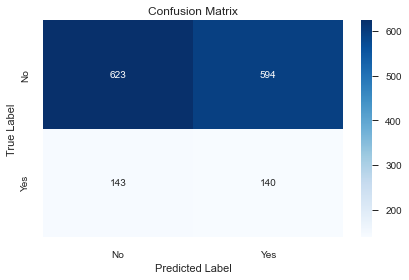

In [105]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['No', 'Yes'])

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()